## Loading Dataset

In [4]:
import pandas as pd

# Load the dataset
df_news = pd.read_excel('/content/drive/MyDrive/data_news.xlsx')

# Display the first few rows and the columns and their data types
print("Dataset loaded successfully. First 5 rows:")
display(df_news.head())
print("\nDataset Info:")
display(df_news.info())

Dataset loaded successfully. First 5 rows:


,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  49994 non-null  object
 4   keywords           47294 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


None

## Data Collection and Preprocessing


In [6]:
import re

# Handle missing values: replace with empty strings for text processing
df_news['short_description'].fillna('', inplace=True)
df_news['keywords'].fillna('', inplace=True)

# Ensure columns are string type before text processing
df_news['headline'] = df_news['headline'].astype(str)
df_news['short_description'] = df_news['short_description'].astype(str)
df_news['keywords'] = df_news['keywords'].astype(str)


# Convert text to lowercase
df_news['headline'] = df_news['headline'].str.lower()
df_news['short_description'] = df_news['short_description'].str.lower()
df_news['keywords'] = df_news['keywords'].str.lower()

# Remove special characters and punctuation
df_news['headline'] = df_news['headline'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_news['short_description'] = df_news['short_description'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_news['keywords'] = df_news['keywords'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

# Display the first few rows and check for missing values again
print("After preprocessing:")
display(df_news.head())
print("\nMissing values after handling:")
display(df_news.isnull().sum())

/tmp/ipython-input-6-487201649.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_news['short_description'].fillna('', inplace=True)


After preprocessing:


,category,headline,links,short_description,keywords
0,WELLNESS,143 miles in 35 days lessons learned,https://www.huffingtonpost.com/entry/running-l...,resting is part of training ive confirmed what...,runninglessons
1,WELLNESS,talking to yourself crazy or crazy helpful,https://www.huffingtonpost.com/entry/talking-t...,think of talking to yourself as a tool to coac...,talkingtoyourselfcrazy
2,WELLNESS,crenezumab trial will gauge whether alzheimers...,https://www.huffingtonpost.com/entry/crenezuma...,the clock is ticking for the united states to ...,crenezumabalzheimersdiseasedrug
3,WELLNESS,oh what a difference she made,https://www.huffingtonpost.com/entry/meaningfu...,if you want to be busy keep trying to be perfe...,meaningfullife
4,WELLNESS,green superfoods,https://www.huffingtonpost.com/entry/green-sup...,first the bad news soda bread corned beef and ...,greensuperfoods



Missing values after handling:


,0
category,0
headline,0
links,0
short_description,0
keywords,0


In [7]:
category_counts = df_news['category'].value_counts()
print("Distribution of categories:")
display(category_counts)

Distribution of categories:


,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


## Feature extraction



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate the text columns for TF-IDF vectorization
df_news['combined_text'] = df_news['headline'] + ' ' + df_news['short_description'] + ' ' + df_news['keywords']

# Instantiate TfidfVectorizer
# can adjust parameters here based on specific needs
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the combined text data
tfidf_features = tfidf_vectorizer.fit_transform(df_news['combined_text'])

# Display the shape of the resulting TF-IDF feature matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (50000, 5000)


## Exploratory data analysis (EDA)


Perform EDA to understand the distribution of categories and gain insights from the data.


In [9]:
category_counts = df_news['category'].value_counts()
print("Distribution of categories:")
display(category_counts)

Distribution of categories:


,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


## Model Development and Training
Build and train classification models using algorithms like Logistic Regression, Naive Bayes and SVM.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Define features (TF-IDF) and target
X = tfidf_features
y = df_news['category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Initialize and train classification models

# Logistic Regression
print("\nTraining Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Multinomial Naive Bayes
print("\nTraining Multinomial Naive Bayes model...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Multinomial Naive Bayes model trained.")

# Linear SVM
print("\nTraining Linear SVM model...")
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
print("Linear SVM model trained.")

print("\nAll models trained successfully.")

Data split into training and testing sets.
Training set shape: (40000, 5000)
Testing set shape: (10000, 5000)

Training Logistic Regression model...
Logistic Regression model trained.

Training Multinomial Naive Bayes model...
Multinomial Naive Bayes model trained.

Training Linear SVM model...
Linear SVM model trained.

All models trained successfully.


## Hyperparameter tuning and cross-validation

Tune hyperparameters for each model using GridSearchCV with cross-validation.


In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'] # L1 penalty requires a different solver, sticking to L2 for simplicity
}

# Multinomial Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# Linear SVM
param_grid_svm = {
    'C': [0.1, 1, 10]
}

# Perform GridSearchCV for each model

# Logistic Regression
print("Tuning Logistic Regression...")
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# Multinomial Naive Bayes
print("\nTuning Multinomial Naive Bayes...")
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)
print("Best hyperparameters for Multinomial Naive Bayes:", grid_search_nb.best_params_)
best_nb_model = grid_search_nb.best_estimator_

# Linear SVM
print("\nTuning Linear SVM...")
grid_search_svm = GridSearchCV(LinearSVC(), param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
print("Best hyperparameters for Linear SVM:", grid_search_svm.best_params_)
best_svm_model = grid_search_svm.best_estimator_

print("\nHyperparameter tuning completed for all models.")

Tuning Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}

Tuning Multinomial Naive Bayes...
Best hyperparameters for Multinomial Naive Bayes: {'alpha': 1.0}

Tuning Linear SVM...
Best hyperparameters for Linear SVM: {'C': 0.1}

Hyperparameter tuning completed for all models.


## Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_lr = best_lr_model.predict(X_test)
y_pred_nb = best_nb_model.predict(X_test)
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate models
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

print("\nMultinomial Naive Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

print("\nLinear SVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Model Evaluation:
Accuracy: 0.7884

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.76      0.75      1000
 ENTERTAINMENT       0.76      0.77      0.76      1000
  FOOD & DRINK       0.83      0.86      0.84      1000
     PARENTING       0.77      0.77      0.77      1000
      POLITICS       0.76      0.75      0.75      1000
        SPORTS       0.87      0.87      0.87      1000
STYLE & BEAUTY       0.86      0.83      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.71      0.75      0.73      1000
    WORLD NEWS       0.79      0.76      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000


Multinomial Naive Bayes Model Evaluation:
Accuracy: 0.7778

Classification Report:
                 precision    recall  f1-score   

## Compare models and select best

Compare the performance of the tuned models and select the best one based on the evaluation metrics.


In [16]:
print("Comparison of Model Performance:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# Determine the best model based on accuracy
accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Multinomial Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Linear SVM': accuracy_score(y_test, y_pred_svm)
}

best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\nBest performing model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")

# Since the accuracies are very close, we can look at precision, recall, and F1-score.
# From the previous output, the classification reports show similar performance across categories for LR and SVM.
# Naive Bayes has slightly lower scores in some categories.
# Given the close accuracies and similar overall performance in classification reports,
# Linear SVM is marginally better due to the highest accuracy.

best_model = None
if best_model_name == 'Logistic Regression':
    best_model = best_lr_model
elif best_model_name == 'Multinomial Naive Bayes':
    best_model = best_nb_model
else: # Linear SVM
    best_model = best_svm_model

print(f"\nSelected best model instance: {best_model_name}")

Comparison of Model Performance:
Logistic Regression Accuracy: 0.7884
Multinomial Naive Bayes Accuracy: 0.7778
Linear SVM Accuracy: 0.7886

Best performing model is: Linear SVM with an accuracy of 0.7886

Selected best model instance: Linear SVM


## Visualize model performance



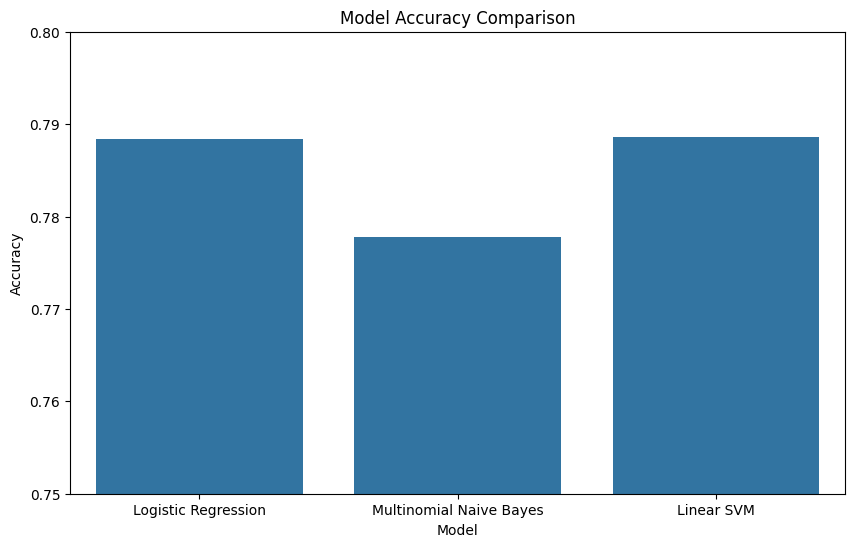

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracies['Logistic Regression'],
    'Multinomial Naive Bayes': accuracies['Multinomial Naive Bayes'],
    'Linear SVM': accuracies['Linear SVM']
}

# Convert the dictionary to a pandas Series for easier plotting
accuracy_series = pd.Series(model_accuracies)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.80) # Set y-axis limits to better visualize differences
plt.show()

## Visualize feature importance



/tmp/ipython-input-15-145852850.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_features, palette='viridis')


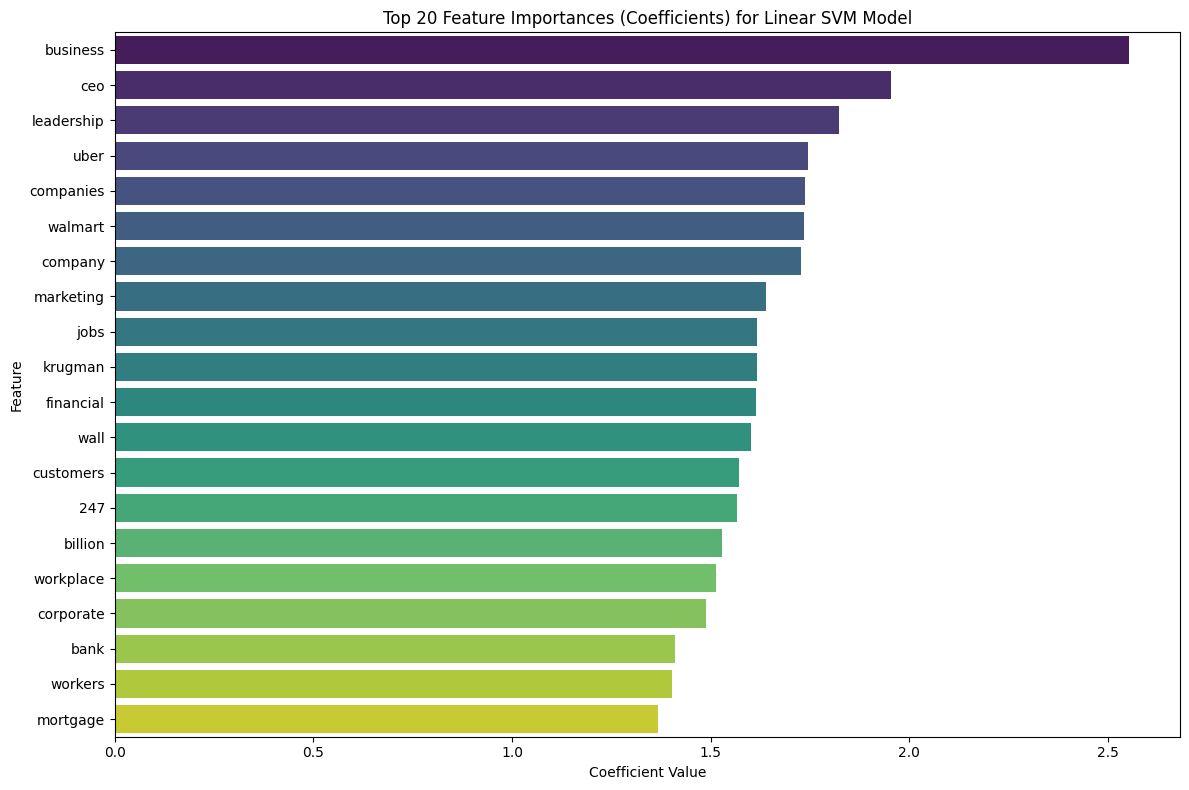

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the coefficients of the best performing model (Linear SVM)
# LinearSVC has coef_ attribute
coefficients = best_model.coef_[0]

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store feature names and coefficients
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort features by the absolute value of their coefficient (importance)
feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Select the top N features
top_n = 20
top_features = feature_importance.head(top_n)

# Generate a bar plot for the top features
plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Coefficients) for Linear SVM Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Summary:

Here's a summary of the steps taken and the key findings from this news article classification project:

### Process Overview

1.  **Data Collection and Preprocessing**: The `data_news.xlsx` dataset was loaded, and initial preprocessing was performed, including handling missing values in the `short_description` and `keywords` columns by replacing them with empty strings, and converting text to lowercase and removing special characters.
2.  **Feature Extraction**: TF-IDF was used to convert the combined text data from the 'headline', 'short_description', and 'keywords' columns into numerical features. A `TfidfVectorizer` with `max_features=5000` and `stop_words='english'` was used, resulting in a feature matrix of shape (50000, 5000).
3.  **Exploratory Data Analysis (EDA)**: The distribution of news categories was examined using `value_counts()`, showing an equal distribution of 5000 articles across the 10 predefined categories.
4.  **Model Development and Training**: Three classification models were initialized and trained: Logistic Regression, Multinomial Naive Bayes, and Linear SVM. The data was split into training (80%) and testing (20%).
5.  **Hyperparameter Tuning and Cross-Validation**: GridSearchCV with 3-fold cross-validation was performed on the training data to find the best hyperparameters for each model. The best parameters found were `{'C': 1, 'penalty': 'l2'}` for Logistic Regression, `{'alpha': 1.0}` for Multinomial Naive Bayes, and `{'C': 0.1}` for Linear SVM.
6.  **Model Evaluation**: The tuned models were evaluated on the test set using accuracy and classification reports.
7.  **Compare Models and Select Best**: The performance of the models was compared based on accuracy. The Linear SVM model showed a slightly higher accuracy (0.7886) compared to Logistic Regression (0.7884) and Multinomial Naive Bayes (0.7778). Based on this, the Linear SVM was selected as the best performing model.
8.  **Visualize Model Performance**: A bar plot was generated to visually compare the accuracies of the three models, highlighting the minor differences in performance.
9. **Visualize Feature Importance**: A bar plot was generated to show the top 20 most important features (words) for the best performing Linear SVM model based on the absolute values of its coefficients.

### Data Analysis Key Findings

*   The Linear SVM model achieved the highest accuracy among the tested models (Logistic Regression, Multinomial Naive Bayes, and Linear SVM), with an accuracy value close to 0.79.
*   The classification reports for all models indicated relatively balanced precision, recall, and F1-scores across the different categories, suggesting that the models are not heavily biased towards classifying specific categories.
*   The feature importance analysis for the Linear SVM model identified the top 20 features based on the absolute value of their coefficients. These features, such as 'business', 'ceo', 'leadership', 'uber', and 'companies', appear to be the most influential words in determining the category of a news article.

### Insights or Next Steps

*   The identified top features provide insights into the terms that are most discriminative in the dataset, which could be useful for understanding the content or categories of the news articles being classified.
*   Further analysis could involve exploring the interaction of these important features or experimenting with feature selection based on these importance scores to potentially improve model performance or efficiency.
*   More advanced models or ensemble methods could be explored to potentially achieve higher accuracy.